<a href="https://colab.research.google.com/github/Suleymanabdy/Data-Science-Checkpoints./blob/main/Supervised_Learning_Classification_Checkpoint_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
!pip install ydata-profiling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from pandas_profiling import ProfileReport


In [ ]:

#Loading the dataset
data = pd.read_csv("/content/drive/MyDrive/African_crises_dataset.csv")

In [ ]:
#Displaying basic information
data.info()

#Displaying the first few rows of the dataset
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [ ]:
#Creating profiling report
profile = ProfileReport(data, title="5G Energy Consumption Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Check for missing values
data.isnull().sum()

,0
country_number,0
country_code,0
country,0
year,0
systemic_crisis,0
exch_usd,0
domestic_debt_in_default,0
sovereign_external_debt_default,0
gdp_weighted_default,0
inflation_annual_cpi,0


In [ ]:
#Checking for duplicates
print(data.duplicated().sum())

#Removing duplicating rows if any
data = data.drop_duplicates()


0


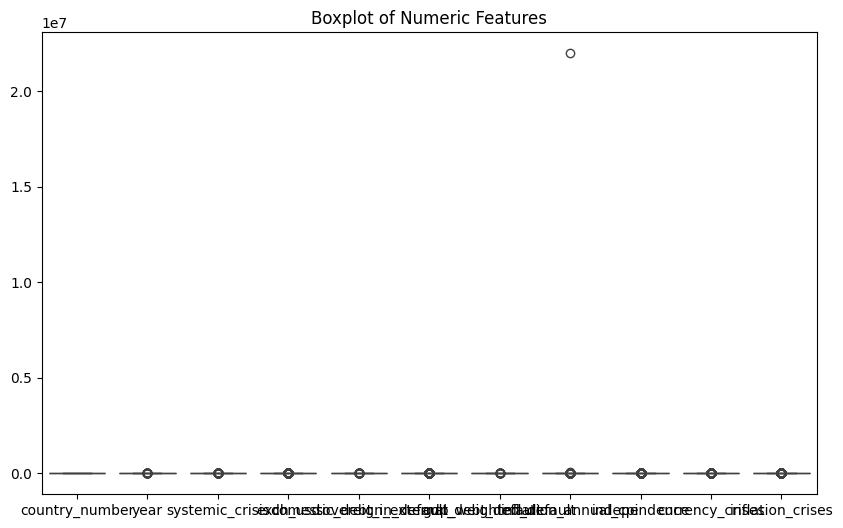

In [ ]:
# Visualizing potential outliers using boxplots for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title("Boxplot of Numeric Features")
plt.show()

# Removing outliers based on z-score
from scipy import stats

threshold = 3
data_cleaned = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < threshold).all(axis=1)]


In [ ]:
# Use one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Alternatively, you can use label encoding for the target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_encoded['systemic_crisis'] = encoder.fit_transform(data_encoded['systemic_crisis'])

# Show the transformed data
print(data_encoded.head())


   country_number  year  systemic_crisis  exch_usd  domestic_debt_in_default  \
1               1  1871                0  0.052798                         0   
2               1  1872                0  0.052274                         0   
3               1  1873                0  0.051680                         0   
4               1  1874                0  0.051308                         0   
5               1  1875                0  0.051546                         0   

   sovereign_external_debt_default  gdp_weighted_default  \
1                                0                   0.0   
2                                0                   0.0   
3                                0                   0.0   
4                                0                   0.0   
5                                0                   0.0   

   inflation_annual_cpi  independence  currency_crises  ...  \
1             14.149140             0                0  ...   
2             -3.718593         

In [ ]:
# Target variable (dependent variable)
target = 'systemic_crisis'

# Features (independent variables)
features = data_encoded.drop(columns=[target])

# Define X and y for modeling
X = features
y = data_encoded[target]


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (715, 35)
Test set size: (179, 35)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 1.0
Confusion Matrix:
 [[179]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       179

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for hyperparameter tuning of RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


 Model Performance and **Improvement**

 Evaluate the model using relevant metrics such as:

Accuracy

Precision

Recall

F1 Score

Confusion Matrix